In [250]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import itertools

# 1. Modeling the activity of a single neuron

In [251]:
data = np.loadtxt("Data_neuron.txt")

### Q1

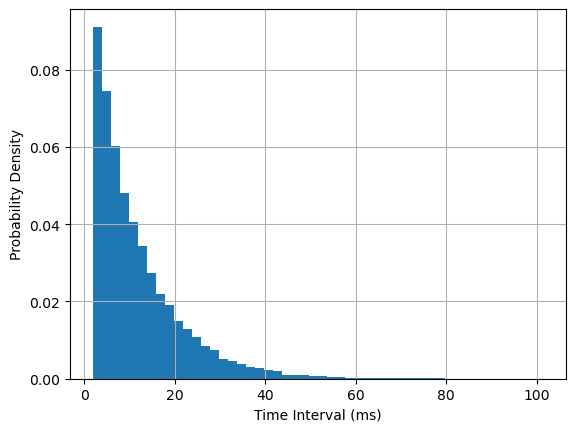

Refractory period is 1.8999999999650754 ms


In [252]:
# Calculate time intervals between successive spikes
time_intervals = np.diff(data)

# Calculate refractory period
refractory_period = np.min(time_intervals)

# Plot the distribution of time intervals
plt.hist(time_intervals, bins=50, density=True)
plt.xlabel('Time Interval (ms)')
plt.ylabel('Probability Density')
plt.grid(True)

plt.savefig("figures/Q1")

plt.show()

print('Refractory period is', refractory_period, 'ms')

### Q2

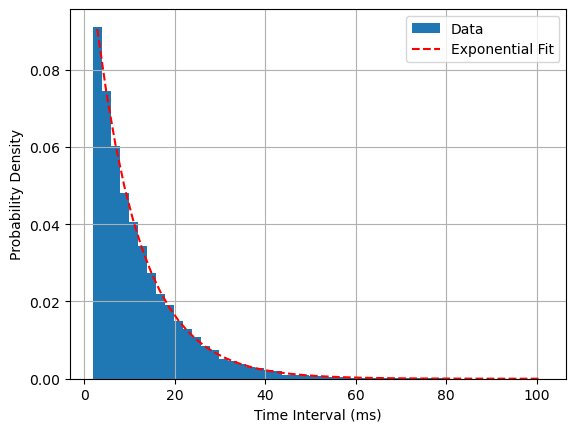

1.2090124398842763
Decay rate is 0.09994167659075802


In [253]:
def exponential_decay(t, A, rate):
    return A * rate * np.exp(-rate*t)

plt.hist(time_intervals, bins=50, density=True, label='Data')

hist, bin_edges = np.histogram(time_intervals, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit an exponential function to the distribution
popt, pcov = curve_fit(exponential_decay, bin_centers, hist)
decay_rate = popt[1]

# Plot the fitted exponential function
plt.plot(bin_centers, exponential_decay(bin_centers, *popt), 'r--', label='Exponential Fit')

plt.xlabel('Time Interval (ms)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

plt.savefig("figures/Q2")

plt.show()

print(popt[0])
print("Decay rate is", decay_rate)

# 3. Application to the analysis of the US supreme Court

### Q6.1

In [254]:
file = open('US_SupremeCourt_n9_N895.txt', 'r')
data = file.readlines()

N = len(data)

print("Total number of datapoints is", N)
print("Number of unique states observed is", len(np.unique(data)))


Total number of datapoints is 895
Number of unique states observed is 128


### Q6.3

In [255]:
# Convert strings to arrays of integers
data_int = [[int(char) for char in line.strip()] for line in data]

# Exchange each 0 for -1 in the dataset
data_modified = [[-1 if value == 0 else value for value in line] for line in data_int]

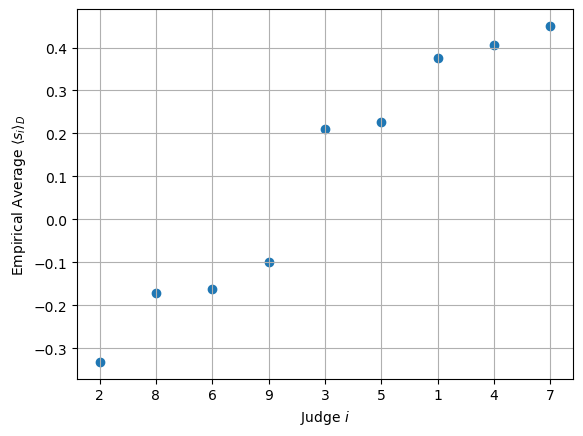

In [263]:
def empirical_averages(judges):
    averages = []
    for judge in judges:
        i = int(judge) - 1
        si_values = [data_point[i] for data_point in data_modified]
        avg_si = sum(si_values) / len(si_values)
        averages.append(avg_si)
    return np.array(averages)

judges = np.array(['1', '2', '3', '4', '5', '6', '7', '8', '9'])

averages = empirical_averages(judges)

order = averages.argsort()

sorted_judges = judges[order]
sorted_averages = averages[order]

plt.scatter(sorted_judges, sorted_values, marker='o')
plt.xlabel(r'Judge $i$')
plt.ylabel(r'Empirical Average $\langle s_i\rangle_D$')
plt.xticks(judges)
plt.grid(True)

plt.savefig("figures/Q6_3a")

plt.show()

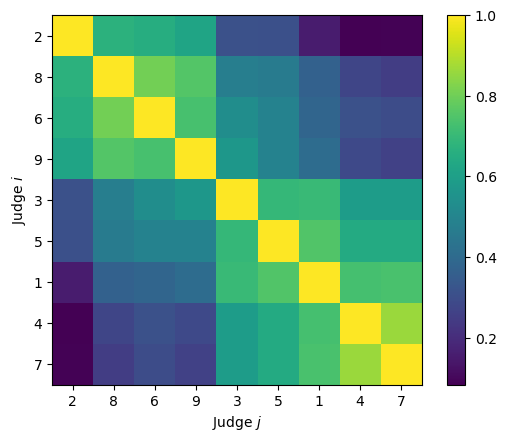

In [257]:
def empirical_averages_pairs(judges):
    averages_matrix = np.zeros((len(judges), len(judges)))
    for judge1 in judges:
        for judge2 in judges:
            i = int(judge1) - 1
            j = int(judge2) - 1
            si_values = [data_point[i] for data_point in data_modified]
            sj_values = [data_point[j] for data_point in data_modified]
            avg_sisj = sum(np.multiply(si_values,sj_values)) / len(si_values)
            averages_matrix[i,j] = avg_sisj
    return averages_matrix

averages_matrix = empirical_averages_pairs(judges)
sorted_averages_matrix = averages_matrix[order][:, order]

plt.imshow(sorted_averages_matrix)
plt.colorbar()
plt.xlabel(r'Judge $j$')
plt.ylabel(r'Judge $i$')
plt.xticks(range(0,9), sorted_judges)
plt.yticks(range(0,9), sorted_judges)

plt.savefig("figures/Q6_3b")

plt.show()

### Q6.4

In [258]:
fitted_hi = np.loadtxt("hi_ussc_unsorted.txt")
fitted_Jij = np.loadtxt("Jij_ussc_unsorted.txt")

In [259]:
print(fitted_hi)
print(fitted_Jij)

[ 0.36383069 -0.42466646  0.13673826  0.07267808  0.01157499 -0.40829869
  0.50529973 -0.16951476  0.06103475]
[-0.37643772  0.4444799   0.25775737  0.60866116 -0.09195291  0.38141723
  0.34711303  0.23926636 -0.04096321 -0.2961683   0.30037143  0.36511615
  0.25878008  0.436645    0.41439466  0.12222307  0.27445886  0.38704692
  0.20152276 -0.17521114  0.58258791  0.22358583  0.11284317  1.01277434
  0.20477437 -0.05206443  0.11950185  0.23108365  0.08892009  0.10075203
  0.28752735  0.6688962   0.28995483 -0.20281667 -0.38629667  0.52331851]


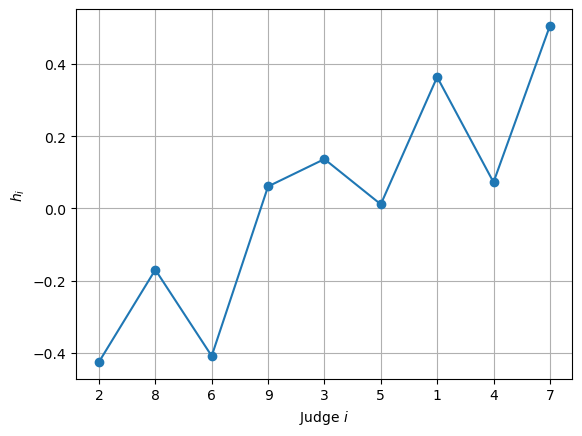

In [260]:
sorted_hi = fitted_hi[order]

# Plot empirical averages
plt.plot(sorted_judges, sorted_hi, marker='o')
plt.xlabel(r'Judge $i$')
plt.ylabel(r'$h_i$')
plt.xticks(judges)
plt.grid(True)

plt.savefig("figures/Q6_4a")

plt.show()

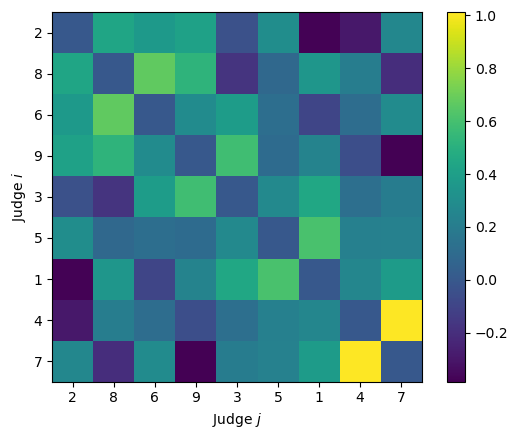

In [261]:
matrix = np.zeros((len(judges), len(judges)))

row, col = np.triu_indices(len(judges), k=1)
matrix[row, col] = fitted_Jij

# Reflect the upper triangular part to the lower triangular part
matrix += matrix.T

# Set diagonal elements to zero
np.fill_diagonal(matrix, 0)

sorted_matrix = matrix[order][:,order]

# Plot the heatmap
plt.imshow(sorted_matrix)
plt.colorbar()
plt.xlabel(r'Judge $j$')
plt.ylabel(r'Judge $i$')
plt.xticks(range(0,9), sorted_judges)
plt.yticks(range(0,9), sorted_judges)

plt.savefig("figures/Q6_4b")

plt.show()

### Q6.5

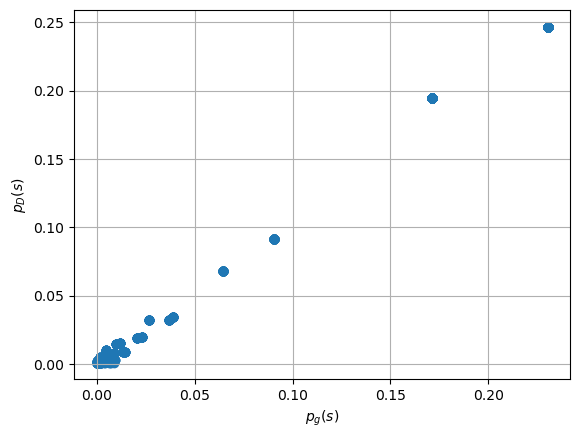

In [262]:
def E(state):
    energie = 0
    for i in range(0,9):
        energie -= fitted_hi[i]*state[i]
    for i in range(0,8):
        for j in range(i+1,9):
            energie -= matrix[i][j]*state[i]*state[j]
    return energie

def model_probability(state):
    p_mod = np.exp(-E(state))/Z
    return p_mod

def K(state):
    K = 0
    for s in data_modified:
        if s == state:
            K += 1
    return K

def empirical_probability(state):
    p_emp = K(state)/N
    return p_emp

possible_states = list(itertools.product([-1, 1], repeat=9))

Z = 0
for s in possible_states:
    energie = E(s)
    Z += np.exp(-energie)

model_probabilities = []
empirical_probabilities = []

for state in data_modified:
    p_emp = empirical_probability(state)
    p_mod = model_probability(state)

    empirical_probabilities.append(p_emp)
    model_probabilities.append(p_mod)

plt.scatter(model_probabilities, empirical_probabilities)
plt.xlabel(r'$p_g(s)$')
plt.ylabel(r'$p_D(s)$')
plt.grid(True)

plt.savefig("figures/Q6_5")

plt.show()